In [117]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [118]:
# Function to standardize data
def shifted_mean(data):
    mean = np.mean(data, axis=0)
  
    X_mean = (data - mean) 
    return X_mean, mean

# Function to calculate covariance matrix
def calculate_covariance_matrix(data):
    num_samples = data.shape[0]
    covariance_matrix = np.dot(data.T, data) / (num_samples - 1)
    print("covariance matrix of shape: ",covariance_matrix.shape)
    return covariance_matrix

# Power Iteration method to find the dominant eigenvalue and eigenvector
def power_iteration(matrix, num_iterations):
    # Initialize a random vector of the same size as the matrix columns
    vector = np.random.rand(matrix.shape[1])

    for _ in range(num_iterations):
        # Multiply the matrix with the vector
        vector = np.dot(matrix, vector)
        
        # Normalize the vector
        vector /= np.linalg.norm(vector)
    
    # Calculate the eigenvalue
    eigenvalue = np.dot(np.dot(matrix, vector), vector) / np.dot(vector, vector)
    
    return eigenvalue, vector

# Function to perform PCA
def apply_pca(data, num_components):
    X_mean, mean = shifted_mean(data)
    covariance_matrix = calculate_covariance_matrix(X_mean)
    
    eigenvalues = []
    eigenvectors = []

    for _ in range(data.shape[1]):
        eigenvalue, eigenvector = power_iteration(covariance_matrix, num_iterations=1000)
        eigenvalues.append(eigenvalue)
        eigenvectors.append(eigenvector)
        
        # Deflate the covariance matrix to find the next largest eigenvalue
        covariance_matrix -= eigenvalue * np.outer(eigenvector, eigenvector)
    
    eigenvalues = np.array(eigenvalues)
    Q_matrix = np.array(eigenvectors).T
    
    

    # Select the top 'num_components' eigenvectors
    principal_components = Q_matrix[:, :num_components]
    

    # Project the data onto the new subspace
    transformed_data = np.dot(X_mean, principal_components)

    # Reconstruct the data (optional)
    reconstructed_data = np.dot(transformed_data, principal_components.T)  + mean

    return transformed_data, reconstructed_data, eigenvalues,Q_matrix

In [119]:

#loading trainning dataset
X=pd.read_csv('C://Users//owner//IRIS.csv')

#X = X.drop(X.columns[0], axis=1)#drop ID cloumn
X=X.drop(['species'],axis=1)#drop label column

print(X.shape)
X


(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [120]:
# Applying PCA

num_components = 2
transformed1, reconstructed1, eigenvalues, Q_matrix, = apply_pca(X.values, num_components)# transforme1 applies using from first 2 components
for i in range (len(eigenvalues)):
    print(eigenvalues[i],Q_matrix[:,i])


covariance matrix of shape:  (4, 4)
4.224840768320113 [ 0.36158968 -0.08226889  0.85657211  0.35884393]
0.24224357162751559 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
0.07852390809415465 [-0.58099728  0.59641809  0.07252408  0.54906091]
0.023683027126002388 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]


In [121]:
print("transformed matrix of shape: ",transformed1.shape)
print("reconstructed matrix of shape: ",reconstructed1.shape)
print("Q_matrix sahpe: ",Q_matrix.shape)

transformed matrix of shape:  (150, 2)
reconstructed matrix of shape:  (150, 4)
Q_matrix sahpe:  (4, 4)


In [122]:
# Select the 2nd components
X_mean,mean=shifted_mean(X.values)
principal_components = Q_matrix[:, 2:4]
print(principal_components)

transformed2 = np.dot(X_mean, principal_components)
print(transformed2.shape)

# Reconstruct the data (optional)
reconstructed2 = np.dot(transformed2, principal_components.T) +mean

[[-0.58099728  0.31725455]
 [ 0.59641809 -0.32409435]
 [ 0.07252408 -0.47971899]
 [ 0.54906091  0.75112056]]
(150, 2)


In [123]:
reconstructed1

array([[5.08718247, 3.51315614, 1.4020428 , 0.21105556],
       [4.75015528, 3.15366444, 1.46254138, 0.23693223],
       [4.70823155, 3.19151946, 1.30746874, 0.17193308],
       [4.64598447, 3.05291508, 1.46083069, 0.23636736],
       [5.07593707, 3.5221472 , 1.36273698, 0.19458132],
       [5.50989516, 3.78723092, 1.67433436, 0.32467514],
       [4.7694235 , 3.22615887, 1.35680169, 0.19254092],
       [5.00550246, 3.39442465, 1.47894375, 0.24343917],
       [4.42432566, 2.87507076, 1.38524961, 0.20498258],
       [4.80645134, 3.19611998, 1.48707882, 0.2471443 ],
       [5.36502046, 3.73593422, 1.49705681, 0.25051099],
       [4.91257705, 3.28468422, 1.51653888, 0.25934854],
       [4.68590546, 3.11713427, 1.41105778, 0.21542658],
       [4.34671081, 2.95208408, 1.08451013, 0.07892134],
       [5.66623966, 4.13706246, 1.28578689, 0.16143081],
       [5.86423565, 4.23140216, 1.48034672, 0.24276779],
       [5.43216343, 3.86672248, 1.36849038, 0.19647248],
       [5.09525312, 3.50475255,

In [124]:
reconstructed2

array([[5.85615086, 3.04084386, 3.75662387, 1.1876111 ],
       [5.99317805, 2.90033556, 3.69612529, 1.16173444],
       [5.83510179, 3.06248054, 3.75119793, 1.22673358],
       [5.79734886, 3.10108492, 3.79783598, 1.16229931],
       [5.76739626, 3.1318528 , 3.79592969, 1.20408534],
       [5.73343818, 3.16676908, 3.78433231, 1.27399153],
       [5.67390984, 3.22784113, 3.80186497, 1.30612575],
       [5.83783087, 3.05957535, 3.77972292, 1.15522749],
       [5.81900768, 3.07892924, 3.77341706, 1.19368408],
       [5.936882  , 2.95788002, 3.77158785, 1.05152236],
       [5.87831288, 3.01806578, 3.76160985, 1.14815568],
       [5.73075628, 3.16931578, 3.84212779, 1.13931812],
       [5.95742787, 2.93686573, 3.74760889, 1.08324009],
       [5.79662252, 3.10191592, 3.77415653, 1.21974533],
       [5.97709368, 2.91693754, 3.67287978, 1.23723586],
       [5.67909768, 3.22259784, 3.77831994, 1.35589888],
       [5.8111699 , 3.08727752, 3.69017629, 1.40219419],
       [5.84808021, 3.04924745,

In [125]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

data = X.values

# DBSCAN implementation
def dbscan(X, eps, min_samples):
    labels = np.zeros(X.shape[0])  # Cluster labels, 0 means noise
    cluster_id = 0

    for i in range(X.shape[0]):
        if labels[i] != 0:  # Skip points that are already assigned to a cluster or marked as noise
            continue

        neighbors = region_query(X, i, eps)  # Find neighbors within eps distance
        if len(neighbors) < min_samples:
            labels[i] = -1  # Mark as noise
        else:
            cluster_id += 1
            expand_cluster(X, labels, i, neighbors, cluster_id, eps, min_samples)

    return labels

def region_query(X, center, eps):
    # Find all points within eps distance from the center
    return [i for i in range(X.shape[0]) if np.linalg.norm(X[center] - X[i]) < eps]

def expand_cluster(X, labels, center, neighbors, cluster_id, eps, min_samples):
    labels[center] = cluster_id

    i = 0
    while i < len(neighbors):
        p = neighbors[i]
        if labels[p] == -1:  # Change noise point to border point
            labels[p] = cluster_id
        elif labels[p] == 0:  # Process unvisited points
            labels[p] = cluster_id
            new_neighbors = region_query(X, p, eps)
            if len(new_neighbors) >= min_samples:
                neighbors += new_neighbors
        i += 1

# Set parameters for DBSCAN
eps = 0.5
min_samples = 4



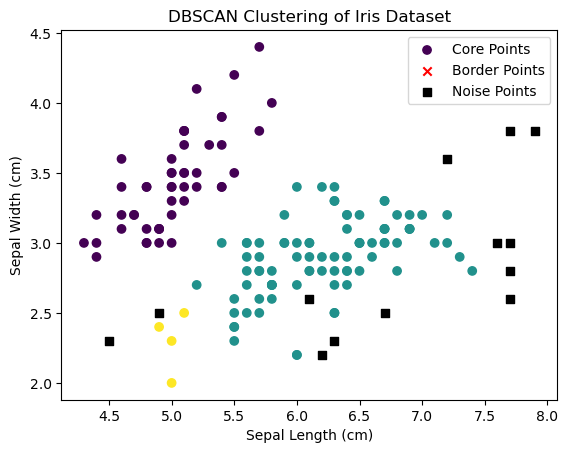

In [126]:
cluster_labels = dbscan(data, eps, min_samples)

# Visualize the clustering result with different markers for core, border, and noise points
core_points = cluster_labels != -1
border_points = (cluster_labels == -1) & (np.isin(range(len(cluster_labels)), np.unique(cluster_labels[cluster_labels != -1])))
noise_points = cluster_labels == -1

plt.scatter(data[core_points, 0], data[core_points, 1], c=cluster_labels[core_points], cmap='viridis', marker='o', label='Core Points')
plt.scatter(data[border_points, 0], data[border_points, 1], c='red', marker='x', label='Border Points')
plt.scatter(data[noise_points, 0], data[noise_points, 1], c='black', marker='s', label='Noise Points')

plt.title('DBSCAN Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

In [127]:
num_clusters = len(np.unique(cluster_labels[cluster_labels != -1]))

print(f"Number of clusters: {num_clusters}")

Number of clusters: 3


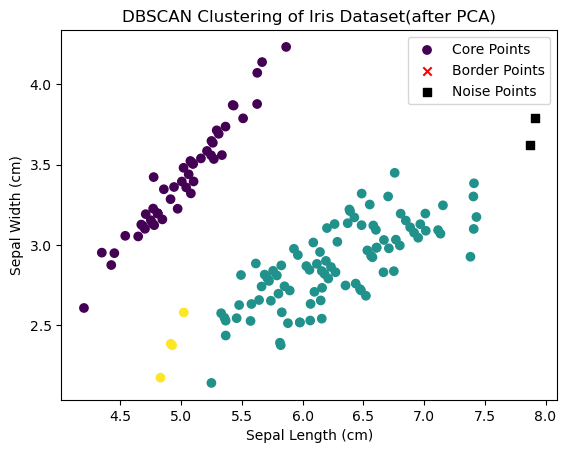

In [128]:
cluster_labels = dbscan(reconstructed1, eps, min_samples)

# Visualize the clustering result with different markers for core, border, and noise points
core_points = cluster_labels != -1
border_points = (cluster_labels == -1) & (np.isin(range(len(cluster_labels)), np.unique(cluster_labels[cluster_labels != -1])))
noise_points = cluster_labels == -1

plt.scatter(reconstructed1[core_points, 0], reconstructed1[core_points, 1], c=cluster_labels[core_points], cmap='viridis', marker='o', label='Core Points')
plt.scatter(reconstructed1[border_points, 0], reconstructed1[border_points, 1], c='red', marker='x', label='Border Points')
plt.scatter(reconstructed1[noise_points, 0], reconstructed1[noise_points, 1], c='black', marker='s', label='Noise Points')

plt.title('DBSCAN Clustering of Iris Dataset(after PCA)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

In [129]:
num_clusters = len(np.unique(cluster_labels[cluster_labels != -1]))

print(f"Number of clusters: {num_clusters}")

Number of clusters: 3
